# Plotting a Tomawac spectrum

Plotting a scalar map of the spectrum file.

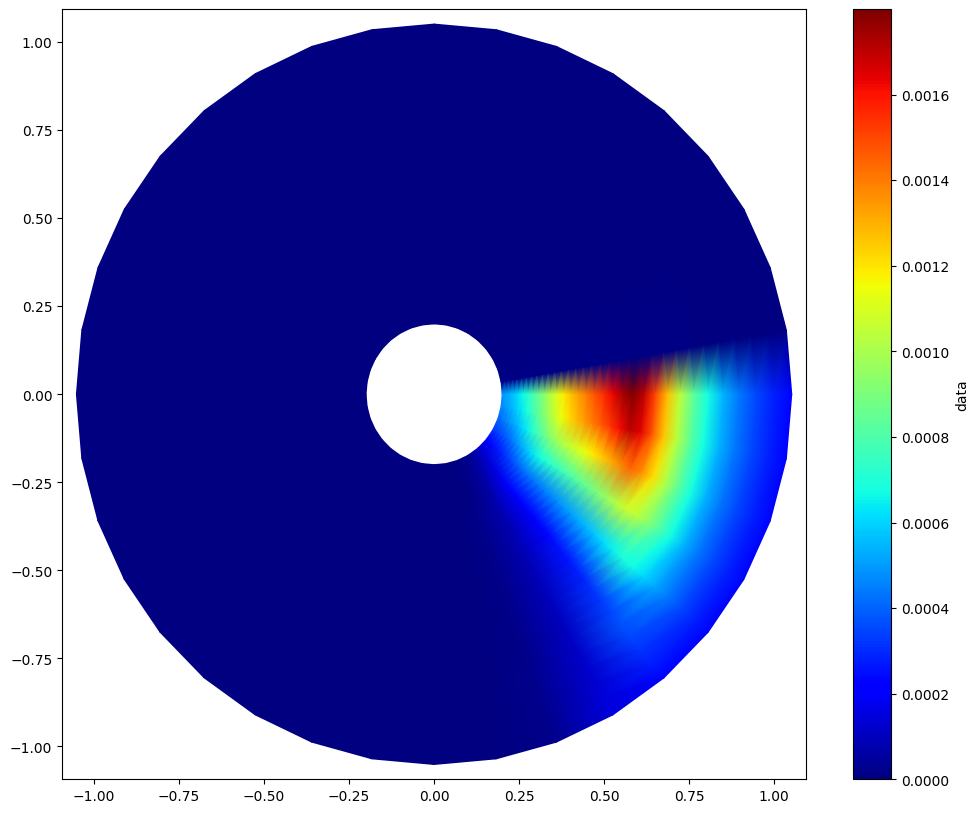

In [1]:
from data_manip.extraction.telemac_file import TelemacFile
from postel.plot2d import plot2d_spectrum, plot2d_quadrangle_mesh
from os import environ, path
import matplotlib.pyplot as plt

file_name = path.join(environ['HOMETEL'], 'examples', 'tomawac', 'impose_spectra', 'tom_OceanicResults_dt10.spe')

# Opening spectrum file
res = TelemacFile(file_name)

# Getting mesh information
x = res.meshx
y = res.meshy

ikle = res.ikle2

# Getting name of the variable containing the spectrum for point 2
varname = res.get_spectrum_varname(2)

# Getting value of the spectrum
data = res.get_data_value(varname, 10)

fig, axe = plt.subplots(figsize=(12, 10))

# Ploting it
plot2d_spectrum(fig, axe, x, y, ikle, data)

plt.show()

del res

# Display spectrum

Display the integrated spectrum over the angles

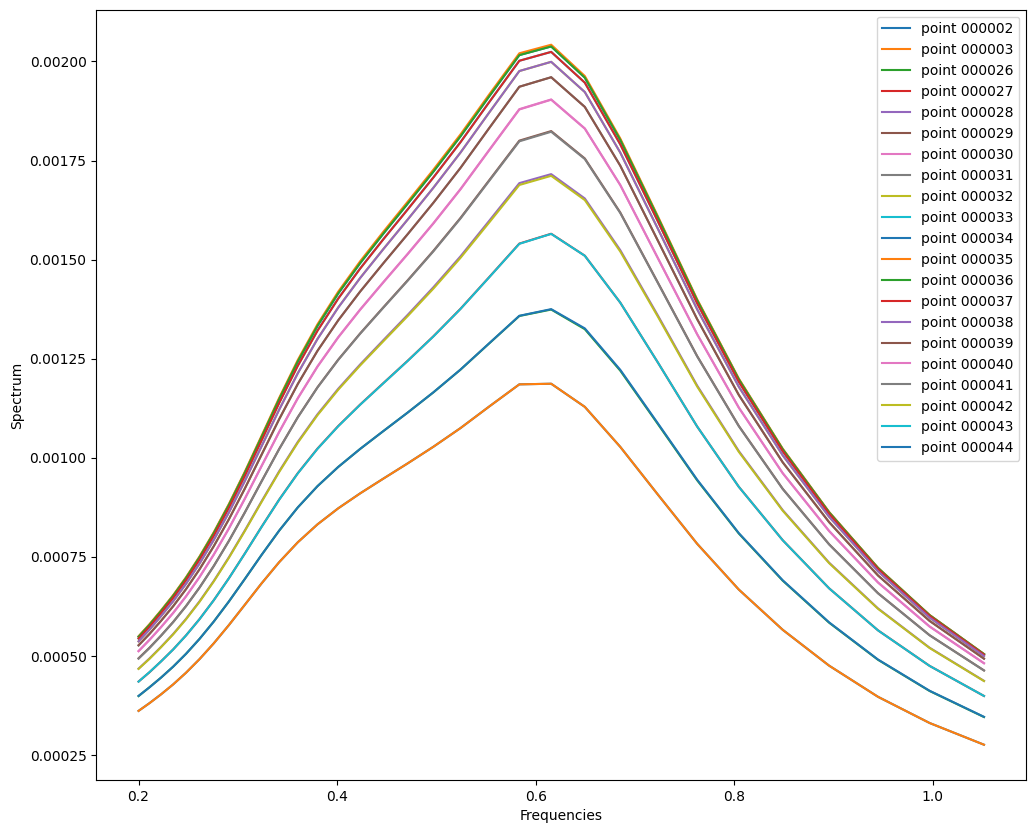

In [2]:
from data_manip.extraction.telemac_file import TelemacFile
from postel.plot1d import plot1d
from os import environ, path
import matplotlib.pyplot as plt

file_name = path.join(environ['HOMETEL'], 'examples', 'tomawac', 'impose_spectra', 'tom_OceanicResults_dt10.spe')

# Opening spectrum file
res = TelemacFile(file_name)

# Getting mesh information (coordinates and connectivity table)
x = res.meshx
y = res.meshy

ikle = res.ikle2

# Getting list of spectrum points available in the file
points = res.get_list_spectrum_points()

record = 10

fig, axe = plt.subplots(figsize=(12, 10))

# Adding plot of spectrum for each point 
for point in points:
    # Getting list of frequencies and spectrum value
    freq, spectrum = res.get_spectrum(point, record)
    # Plotting it
    plot1d(axe, freq, spectrum, plot_label='point {:06d}'.format(point), x_label='Frequencies', y_label='Spectrum')

axe.legend()

plt.show()

del res

# Display angular dispersion

Display the angular dispersion integration over the frequencies.

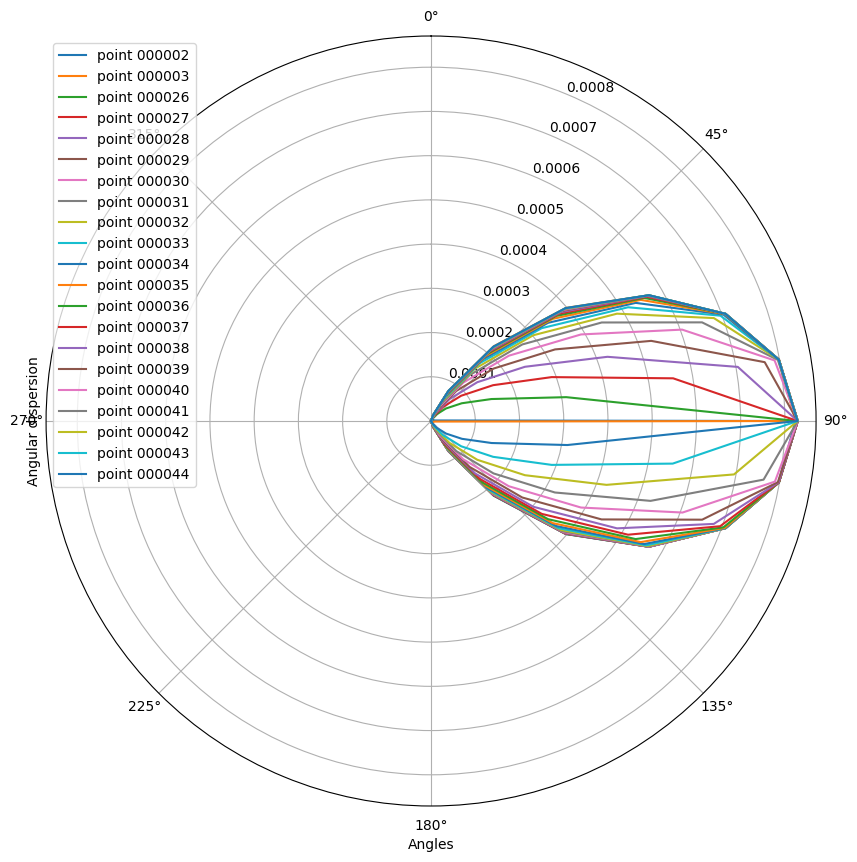

In [3]:
from data_manip.extraction.telemac_file import TelemacFile
from postel.plot1d import plot1d
from os import environ, path
import matplotlib.pyplot as plt

file_name = path.join(environ['HOMETEL'], 'examples', 'tomawac', 'impose_spectra', 'tom_OceanicResults_dt10.spe')

# Opening spectrum file
res = TelemacFile(file_name)

# Getting mesh information (coordinates and connectivity table)
x = res.meshx
y = res.meshy

ikle = res.ikle2

# Getting list of spectrum points available in the file
points = res.get_list_spectrum_points()

record = 10

fig, axe = plt.subplots(figsize=(12, 10), subplot_kw={'projection': 'polar'})

# Adding plot of spectrum for each point 
for point in points:
    # Getting list of frequencies and spectrum value
    theta, disp = res.get_angular_dispersion(point, record, radian=True)

    plot1d(axe, theta, disp, 
           plot_label='point {:06d}'.format(point), 
           x_label='Angles', 
           y_label='Angular dispersion')
    # Setting zero location to the north
    axe.set_theta_zero_location("N") 
    # Setting angles counter-clockwise
    axe.set_theta_direction(-1)

axe.legend()

plt.show()

del res